In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
# Step 1: Install kaggle
!pip install -q kaggle

# Step 2: Set Kaggle credentials (paste your username & key here)
import os
os.environ['KAGGLE_USERNAME'] = "ashikurrahman2"
os.environ['KAGGLE_KEY'] = "467d3db544d859c777f9e8863cc51ed7"

!kaggle datasets download -d tongpython/cat-and-dog





Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 68% 148M/218M [00:00<00:00, 1.54GB/s]
100% 218M/218M [00:00<00:00, 1.05GB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/cat-and-dog.zip", 'r')
zip_ref.extractall("/content/dog vs cat dataset")
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

In [6]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model = Sequential()

In [9]:
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
conv_base.trainable = False

In [11]:
# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dog vs cat dataset/training_set/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dog vs cat dataset/test_set/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


# **Normalize**

In [12]:
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(train_ds,validation_data=validation_ds,epochs=10)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 46s 145ms/step - accuracy: 0.8331 - loss: 0.4316 - val_accuracy: 0.8764 - val_loss: 0.2981
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 124ms/step - accuracy: 0.9154 - loss: 0.2023 - val_accuracy: 0.8972 - val_loss: 0.2389
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 125ms/step - accuracy: 0.9328 - loss: 0.1603 - val_accuracy: 0.8883 - val_loss: 0.2712
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 124ms/step - accuracy: 0.9549 - loss: 0.1153 - val_accuracy: 0.8868 - val_loss: 0.2977
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 124ms/step - accuracy: 0.9626 - loss: 0.0935 - val_accuracy: 0.9001 - val_loss: 0.2924
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 122ms/step - accuracy: 0.9657 - loss: 0.0894 - val_accuracy: 0.8532 - val_loss: 0.5129
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 123ms/step - accuracy: 0.9770 - loss: 0.0625 - val_accuracy: 0.8952 - val_loss: 0.3584
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 123ms/step - accuracy: 0.9858 - loss: 0

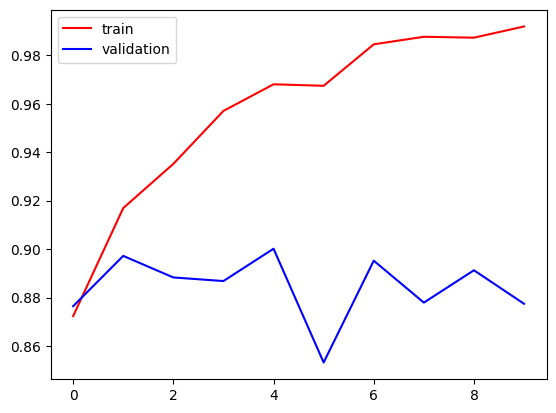

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

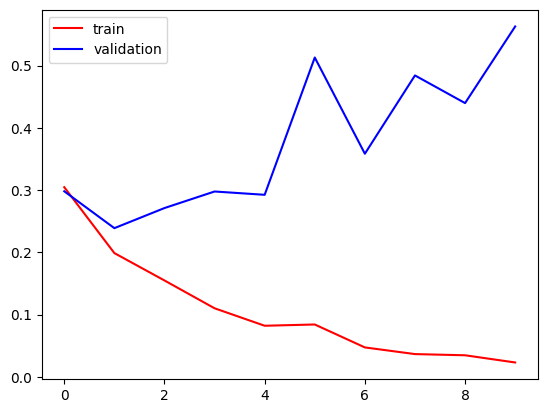

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()